<a href="https://colab.research.google.com/github/unna97/fastai/blob/master/majorproject_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/unna97/majorproject

fatal: destination path 'majorproject' already exists and is not an empty directory.


In [2]:
!unzip '/content/majorproject/*.zip'

Archive:  /content/majorproject/file (100-149).zip
   creating: content/output/
   creating: content/output/MFCC/
  inflating: content/output/MFCC/119.jpg  
  inflating: content/output/MFCC/108.jpg  
  inflating: content/output/MFCC/143.jpg  
  inflating: content/output/MFCC/145.jpg  
  inflating: content/output/MFCC/132.jpg  
  inflating: content/output/MFCC/139.jpg  
  inflating: content/output/MFCC/104.jpg  
  inflating: content/output/MFCC/149.jpg  
  inflating: content/output/MFCC/117.jpg  
  inflating: content/output/MFCC/106.jpg  
  inflating: content/output/MFCC/134.jpg  
  inflating: content/output/MFCC/105.jpg  
  inflating: content/output/MFCC/146.jpg  
  inflating: content/output/MFCC/128.jpg  
  inflating: content/output/MFCC/127.jpg  
  inflating: content/output/MFCC/136.jpg  
  inflating: content/output/MFCC/120.jpg  
  inflating: content/output/MFCC/144.jpg  
  inflating: content/output/MFCC/148.jpg  
  inflating: content/output/MFCC/147.jpg  
  inflating: content/outpu

In [0]:
!cp -r '/content/content/output/Filbank/'  '/content'
!cp -r '/content/content/output/MFCC/' '/content'
!cp -r '/content/file(0-49)/content/output/Filbank/' '/content'
!cp -r '/content/file(0-49)/content/output/MFCC' '/content'
!cp -r '/content/file(50-99)/content/output/Filbank' '/content'
!cp -r '/content/file(50-99)/content/output/MFCC' '/content'

In [0]:
!rm -r '/content/content'
!rm -r '/content/file(50-99)'
!rm -r '/content/file(0-49)'

In [0]:
from fastai import *
from fastai.vision import *

In [0]:
from urllib.request import urlretrieve
import os

def download(url, file):
    if not os.path.isfile(file):
        print("Download file... " + file + " ...")
        urlretrieve(url,file)
        print("File downloaded")

In [0]:
download('https://raw.githubusercontent.com/karoldvl/ESC-50/master/meta/esc50.csv','esc50')

In [0]:
import pandas as pd 

In [0]:
df=pd.read_csv('/content/esc50')

In [10]:
df.head()

,filename,fold,target,category,esc10,src_file,take
0,1-100032-A-0.wav,1,0,dog,True,100032,A
1,1-100038-A-14.wav,1,14,chirping_birds,False,100038,A
2,1-100210-A-36.wav,1,36,vacuum_cleaner,False,100210,A
3,1-100210-B-36.wav,1,36,vacuum_cleaner,False,100210,B
4,1-101296-A-19.wav,1,19,thunderstorm,False,101296,A


In [14]:
data.random_split_by_pct()

ItemLists;

Train: ImageItemList (1600 items)
Image (3, 293, 1322),Image (3, 293, 1322),Image (3, 293, 1322),Image (3, 293, 1322),Image (3, 293, 1322)
Path: /content;

Valid: ImageItemList (400 items)
Image (3, 293, 1322),Image (3, 293, 1322),Image (3, 293, 1322),Image (3, 293, 1322),Image (3, 293, 1322)
Path: /content;

Test: None

In [0]:
x=list(range(2000))
for i in range(2000):
  x[i]=str(i)+'.jpg'
df['file']=x

In [0]:
data=ImageItemList.from_df(df,'/content',cols='file',folder="Filbank").random_split_by_pct().label_from_df(cols='category').databunch(bs=8)


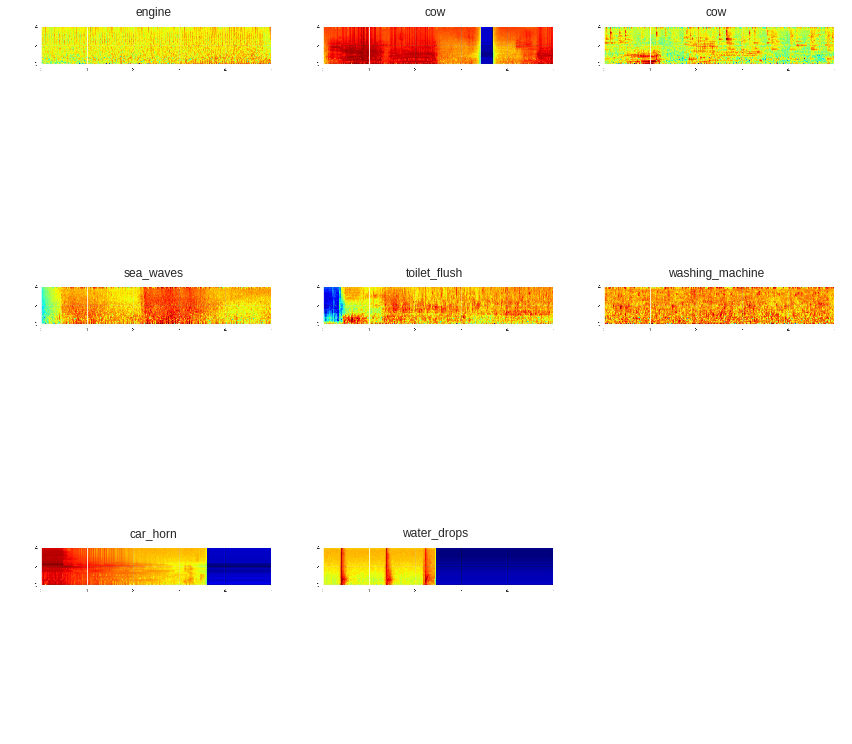

In [35]:
data.show_batch()

In [0]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [37]:
learn.model



Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [38]:
learn.fit_one_cycle(4)


epoch,train_loss,valid_loss,error_rate
1,3.390757,2.656255,0.687500
2,2.651007,2.050617,0.582500
3,1.915680,1.707010,0.447500
4,1.587880,1.609443,0.400000


In [0]:
interp = ClassificationInterpretation.from_learner(learn)


In [0]:
learn.save('stage-1')


In [0]:
learn.unfreeze()

In [43]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 2.09E-05


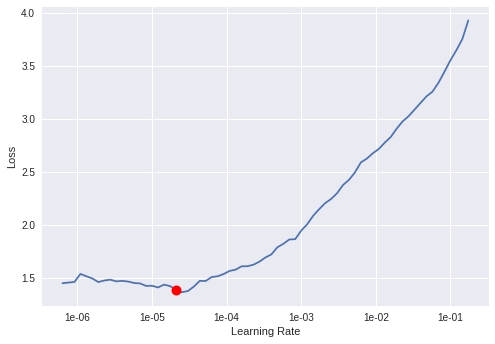

In [44]:
learn.recorder.plot()

In [45]:
learn.fit_one_cycle(5,slice(1e-5))

epoch,train_loss,valid_loss,error_rate
1,1.419566,1.591972,0.392500
2,1.455897,1.593178,0.427500
3,1.363471,1.557876,0.395000
4,1.393293,1.569424,0.400000
5,1.385080,1.540317,0.385000


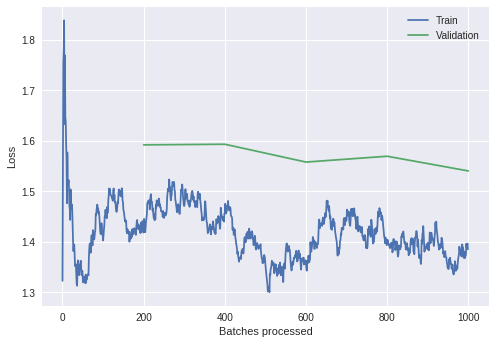

In [46]:
learn.recorder.plot_losses()


In [0]:
interp = ClassificationInterpretation.from_learner(learn)


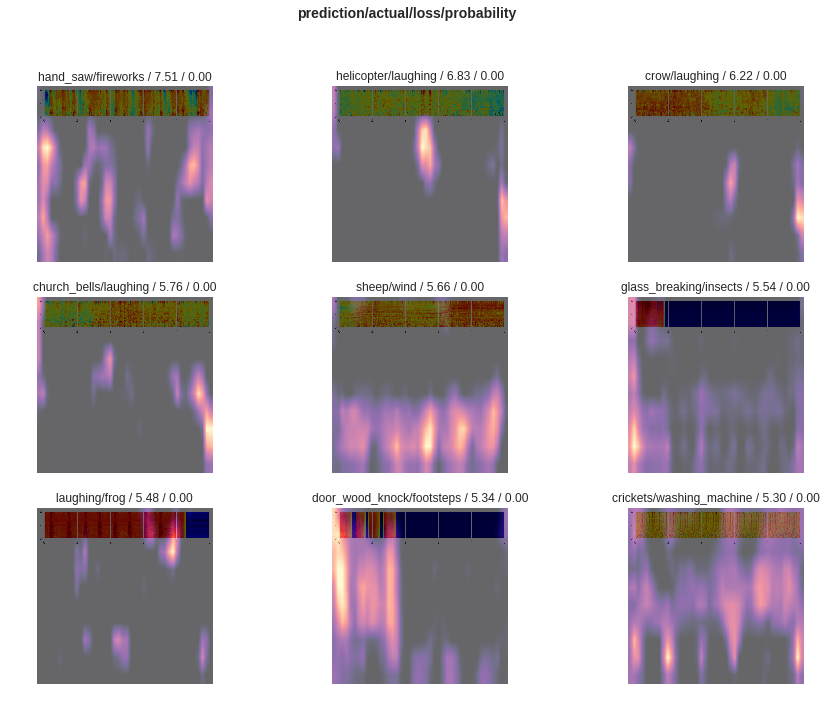

In [50]:
interp.plot_top_losses(9, figsize=(15,11))


In [52]:
interp.most_confused()
i

[('vacuum_cleaner', 'wind', 4),
 ('breathing', 'snoring', 2),
 ('chainsaw', 'sea_waves', 2),
 ('clock_alarm', 'crickets', 2),
 ('crow', 'sheep', 2),
 ('dog', 'crow', 2),
 ('dog', 'sneezing', 2),
 ('footsteps', 'crackling_fire', 2),
 ('frog', 'chirping_birds', 2),
 ('glass_breaking', 'sneezing', 2),
 ('hen', 'pig', 2),
 ('mouse_click', 'can_opening', 2),
 ('mouse_click', 'keyboard_typing', 2),
 ('pig', 'rooster', 2),
 ('rain', 'crackling_fire', 2),
 ('rain', 'engine', 2),
 ('sheep', 'airplane', 2),
 ('vacuum_cleaner', 'sea_waves', 2),
 ('washing_machine', 'wind', 2),
 ('wind', 'airplane', 2),
 ('airplane', 'thunderstorm', 1),
 ('breathing', 'car_horn', 1),
 ('breathing', 'crow', 1),
 ('breathing', 'glass_breaking', 1),
 ('breathing', 'rooster', 1),
 ('can_opening', 'coughing', 1),
 ('can_opening', 'door_wood_creaks', 1),
 ('car_horn', 'airplane', 1),
 ('car_horn', 'cat', 1),
 ('car_horn', 'helicopter', 1),
 ('car_horn', 'rooster', 1),
 ('car_horn', 'thunderstorm', 1),
 ('cat', 'glass_br